In [1]:
# Import Libraries
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.utils import shuffle

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [2]:
def alexnet(width, height, lr):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 3, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

In [3]:
data = np.load('data.npz')

test_data = data['test_data']
train_data = data['train_data']

# shuffle data
train_data = shuffle(train_data)

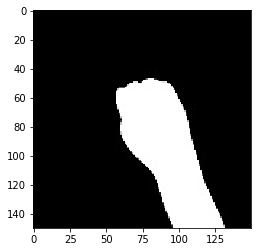

In [4]:
plt.imshow(train_data[0][0], cmap='gray')

In [5]:
for img_label in train_data[:10]:
    print(img_label[0].shape)

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)


In [6]:
WIDTH = 150
HEIGHT = 150
LR = 1e-3
EPOCHS = 6

In [7]:
X = np.array([i[0] for i in train_data]).reshape(-1,WIDTH,HEIGHT,1)

In [8]:
X.shape

(6018, 150, 150, 1)

In [9]:
test_X = np.array([i[0] for i in test_data]).reshape(-1,WIDTH,HEIGHT,1)

In [10]:
a = [1,0,0]
b = [0,1,0]
c = [0,0,1]

In [11]:
def one_hot(data):
    if data == 0:
        return a 
    elif data == 1:
        return b 
    elif data == 2:
        return c

In [12]:
y = [one_hot(i[1]) for i in train_data if i[1] < 3]

In [13]:
test_y = [one_hot(i[1]) for i in test_data if i[1] <3]

In [14]:
model = alexnet(WIDTH, HEIGHT, LR)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [18]:
model.fit({'input': X}, {'targets': np.array(y)}, n_epoch=EPOCHS, validation_set=({'input': test_X}, {'targets': np.array(test_y)}), 
            snapshot_step=500, show_metric=True, run_id='model')

Training Step: 759  | total loss: 0.07761 | time: 320.128s
| Momentum | epoch: 008 | loss: 0.07761 - acc: 0.9938 -- iter: 6016/6018
Training Step: 760  | total loss: 0.06990 | time: 325.472s
| Momentum | epoch: 008 | loss: 0.06990 - acc: 0.9944 | val_loss: 0.00020 - val_acc: 1.0000 -- iter: 6018/6018
--


In [19]:
model.save('model')